<a href="https://colab.research.google.com/github/hwuiwon/data-analysis-study/blob/master/03_Summary_and_Visualization_of_Variable_Properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **03-Summary-and-Visualization-of-Variable-Properties**

Click [this](https://colab.research.google.com/notebook#create=true&language=r) to create new R-Notebook.

Data used in this notebook can be found [here](https://drive.google.com/open?id=17GRc4sLAe_gBR5ezJOUeU6Na5lX5OVby).

In [0]:
library(IRdisplay)

In [0]:
# Set working directory
setwd('/content/r_data')

In [5]:
# install libraries that give statistical analysis
install.packages(c('psych', 'Hmisc', 'skimr'))
library(psych)
library(Hmisc)
library(skimr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘mnormt’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’


Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha



Attaching package: ‘Hmisc’


The following object is masked from ‘package:psych’:

    describe


The following objects are masked from ‘package:base’:

    format.pval, units




## **Categorical Variable**

In [6]:
# Load dataset
my <- read.csv(file = 'tour.csv', header = TRUE, sep = ',',
               stringsAsFactors = FALSE, strip.white = TRUE,
               na.strings = c('.', '?', 'NA'))
names_used <- c('month', 'gender', 'edu', 'job', 'age', 'nat', 'other',
                'object', 'member', 'accom', 'activity')

# Extract columns selected above from 'my'
ctg <- my[names_used]
head(ctg)
summary(ctg)

,month,gender,edu,job,age,nat,other,object,member,accom,activity
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3,2,1,8,0,1,NA,8,3,1,19
2,11,1,2,2,3,4,1,1,2,1,18
3,6,1,3,8,1,13,NA,7,1,3,22
4,2,1,2,8,1,9,NA,5,1,4,1
5,8,1,3,6,2,9,1,1,1,2,17
6,2,2,3,12,1,8,NA,1,3,2,11


     month            gender           edu             job        
 Min.   : 1.000   Min.   :1.000   Min.   :1.000   Min.   : 1.000  
 1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.: 3.000  
 Median : 6.000   Median :2.000   Median :2.000   Median : 5.000  
 Mean   : 6.466   Mean   :1.518   Mean   :2.094   Mean   : 5.345  
 3rd Qu.: 9.000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.: 8.000  
 Max.   :12.000   Max.   :2.000   Max.   :4.000   Max.   :17.000  
                                  NA's   :140     NA's   :52      
      age             nat             other            object     
 Min.   :0.000   Min.   : 1.000   Min.   : 1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.:1.000  
 Median :2.000   Median : 6.000   Median : 1.000   Median :1.000  
 Mean   :1.906   Mean   : 7.305   Mean   : 4.054   Mean   :3.198  
 3rd Qu.:3.000   3rd Qu.:12.000   3rd Qu.: 5.000   3rd Qu.:6.000  
 Max.   :5.000   Max.   :19.000   Max.   :20.000   Max.   :8.0

In [7]:
# Convert gender variable to factor
ctg$gender_f <- factor(ctg$gender, levels = c(1, 2), labels = c('M', 'F'))
head(ctg)

# Calculate frequency
gender_freq <- table(ctg$gender_f)
gender_freq

# Calculate proportion
gender_prop <- prop.table(gender_freq)
round(gender_prop, 3)
round(gender_prop, 3) * 100

,month,gender,edu,job,age,nat,other,object,member,accom,activity,gender_f
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,3,2,1,8,0,1,NA,8,3,1,19,F
2,11,1,2,2,3,4,1,1,2,1,18,M
3,6,1,3,8,1,13,NA,7,1,3,22,M
4,2,1,2,8,1,9,NA,5,1,4,1,M
5,8,1,3,6,2,9,1,1,1,2,17,M
6,2,2,3,12,1,8,NA,1,3,2,11,F



   M    F 
6670 7171 


    M     F 
0.482 0.518 


   M    F 
48.2 51.8 

### **Creating Barplot (1)**

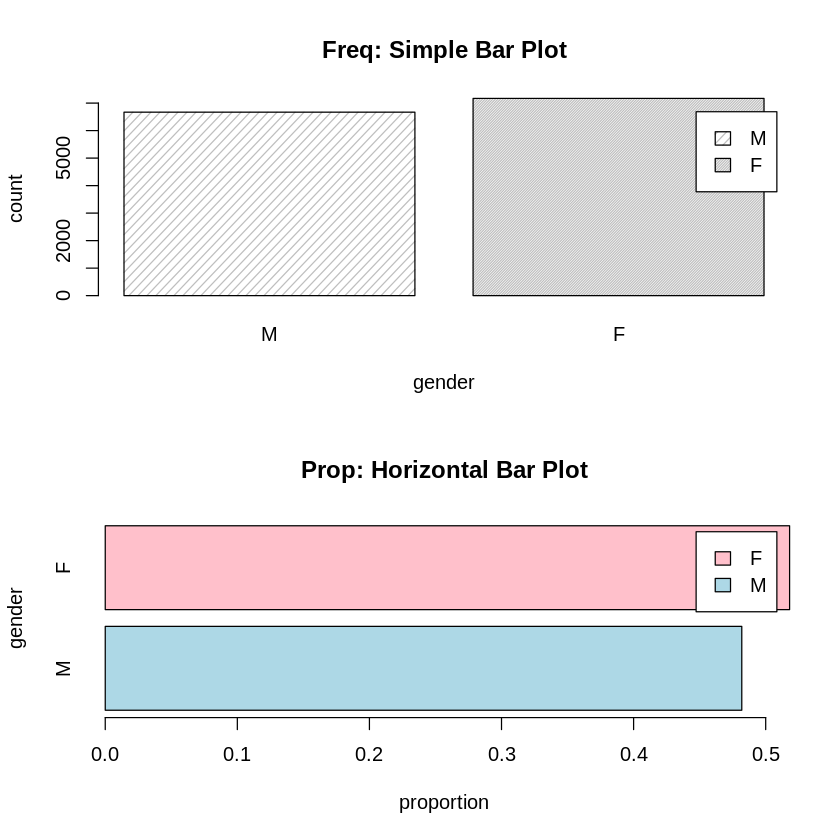

In [8]:
# Create data graph by using barplot()
# mfrow: c(row, col)
par(mfrow = c(2, 1))

barplot(gender_freq, main = 'Freq: Simple Bar Plot', xlab = 'gender', ylab = 'count',
        density = c(20, 70), legend = rownames(gender_freq))

barplot(gender_prop, main = 'Prop: Horizontal Bar Plot', xlab = 'proportion', ylab = 'gender',
        horiz = TRUE, col = c('lightblue', 'pink'), beside = TRUE, legend = rownames(gender_prop))

### **Aggregated Summary**

In [28]:
ctg$object_f <- factor(ctg$object, levels = c(1:8), labels = c('Vacation',
                       'Beauty', 'Religion', 'Shopping', 'Family', 'Business',
                       'Education', 'ETC'))
object_freq <- table(ctg$object_f)
object_prop <- prop.table(object_freq)

# Convert results to DataFrame
obj_df <- as.data.frame(object_freq)
obj_prop_df <- as.data.frame(object_prop)
obj_df

# Create proportion DataFrame
object_pect <- round(object_prop, 3) * 100
object_pect
obj_pect_df <- as.data.frame(object_pect)
obj_pect_df

Var1,Freq
<fct>,<int>
Vacation,6981
Beauty,193
Religion,64
Shopping,1139
Family,1514
Business,3119
Education,780
ETC,51



 Vacation    Beauty  Religion  Shopping    Family  Business Education       ETC 
     50.4       1.4       0.5       8.2      10.9      22.5       5.6       0.4 

Var1,Freq
<fct>,<dbl>
Vacation,50.4
Beauty,1.4
Religion,0.5
Shopping,8.2
Family,10.9
Business,22.5
Education,5.6
ETC,0.4


### **Creating Barplot (2)**

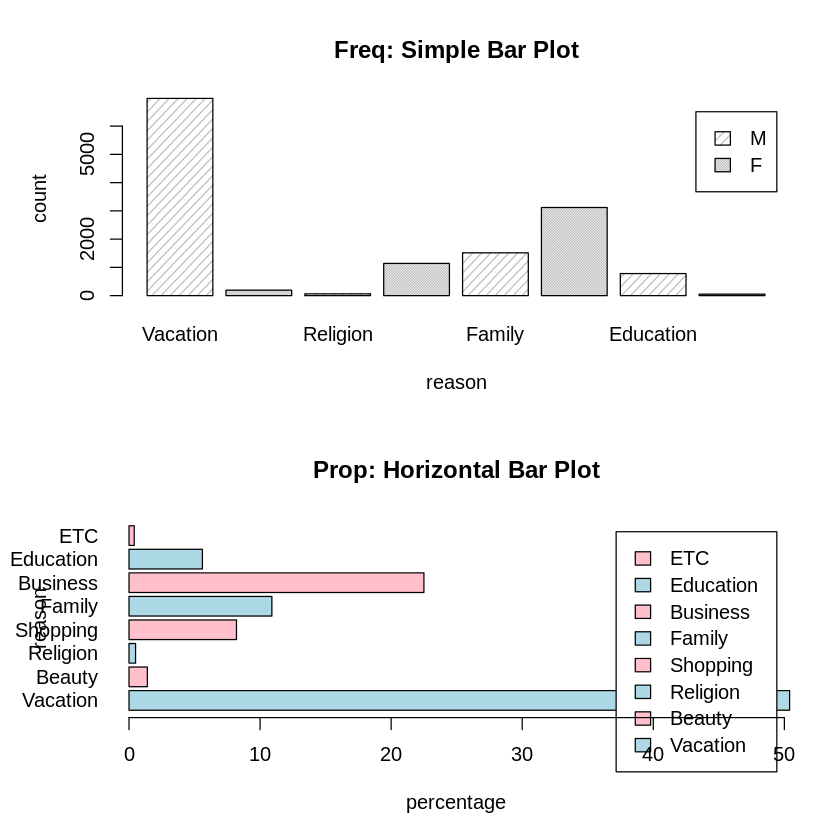

In [46]:
# Create data graph by using barplot()
# mfrow: c(row, col)
par(mfrow = c(2, 1), mar = c(5, 5, 4, 2) + 0.1)

# las: label axis
barplot(object_freq, main = 'Freq: Simple Bar Plot', xlab = 'reason', ylab = 'count',
        density = c(20, 70), legend = rownames(gender_freq))

barplot(object_pect, main = 'Prop: Horizontal Bar Plot', xlab = 'percentage', ylab = 'reason',
        las = 1, horiz = TRUE, col = c('lightblue', 'pink'), beside = TRUE, legend = rownames(object_pect))

# Reset canvas
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

### **Analyzing Ordinal Variable**

In [51]:
# Analyzing age

head(ctg$age)
length(ctg$age)
Hmisc::describe(ctg$age)

[1] 0 3 1 1 2 1

[1] 13841

ctg$age 
       n  missing distinct     Info     Mean      Gmd 
   13824       17        6    0.916    1.906    1.306 

lowest : 0 1 2 3 4, highest: 1 2 3 4 5
                                              
Value          0     1     2     3     4     5
Frequency    933  5473  3511  2212  1253   442
Proportion 0.067 0.396 0.254 0.160 0.091 0.032

In [58]:
ctg$age_f <- factor(ctg$age, levels = c(0, 1, 2, 3, 4, 5),
                    labels = c('5~20', '21~30', '31~40', '41~50', '51~60', 'Over 61'))
age_freq <- table(ctg$age_f)
age_prop <- prop.table(age_freq)
age_df <- as.data.frame(age_prop)

age_freq
age_prop
age_df


   5~20   21~30   31~40   41~50   51~60 Over 61 
    933    5473    3511    2212    1253     442 


      5~20      21~30      31~40      41~50      51~60    Over 61 
0.06749132 0.39590567 0.25397859 0.16001157 0.09063947 0.03197338 

Var1,Freq
<fct>,<dbl>
5~20,0.06749132
21~30,0.39590567
31~40,0.25397859
41~50,0.16001157
51~60,0.09063947
Over 61,0.03197338


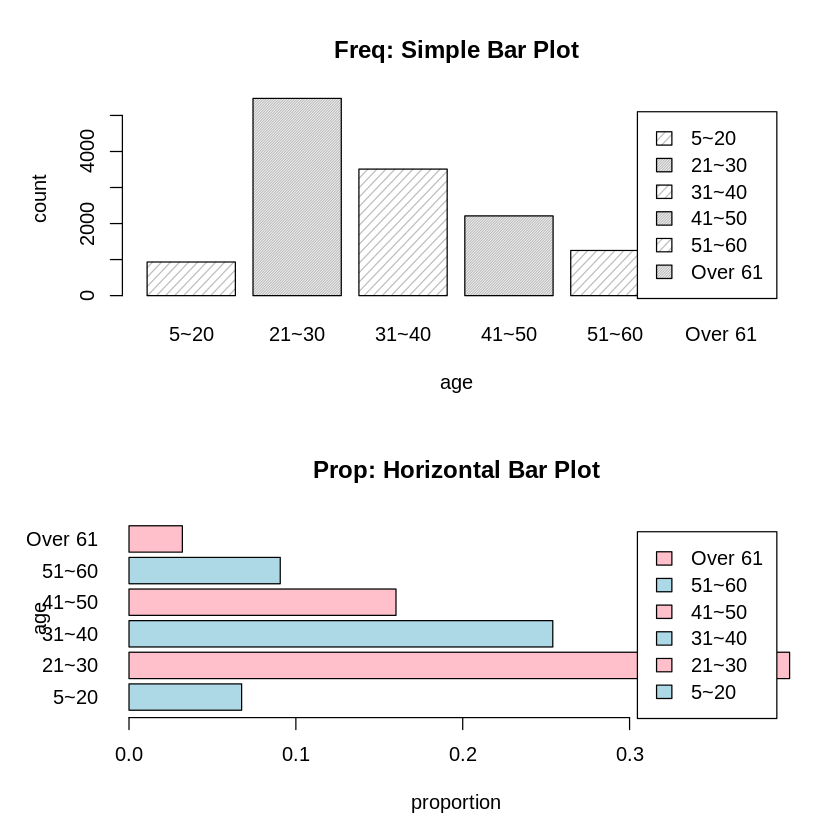

In [60]:
# Create data graph by using barplot()
# mfrow: c(row, col)
par(mfrow = c(2, 1), mar = c(5, 5, 4, 2) + 0.1)

# las: label axis
barplot(age_freq, main = 'Freq: Simple Bar Plot', xlab = 'age', ylab = 'count',
        density = c(20, 70), legend = rownames(age_freq))

barplot(age_prop, main = 'Prop: Horizontal Bar Plot', xlab = 'proportion', ylab = 'age',
        las = 1, horiz = TRUE, col = c('lightblue', 'pink'), beside = TRUE, legend = rownames(age_prop))

# Reset canvas
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)